#Tarea 1 -- formulario de respuestas

En este notebook pueden ingresar sus respuestas a las preguntas de tarea 1, y asegurarse que sus comandos SQL funcionan de manera adecuada.

### Iniciar el servidor

Cómo siempre, para poder ocupar el notebook, lo deben subir a https://colab.research.google.com

Luego, ejecutando el siguiente campo, se crea una instancia de servidor postgres, dónde pueden realizar sus consultas.

In [ ]:
# install
!apt update
!apt install postgresql postgresql-contrib &>log
!service postgresql start
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
# set connection
%load_ext sql
%config SqlMagic.feedback=False 
%config SqlMagic.autopandas=True
%sql postgresql+psycopg2://@/postgres

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-upda

'Connected: @postgres'

##Pregunta 1
La primera tarea que debes realizar es escribir un esquema relacional para nuestro caso de uso, especificando los nombres de las tablas, los tipos de atributos, y nombrar las llaves primarias en cada tabla.
Adicionalmente, debes explicar cómo lograste guardar la información que una persona participa en un taller, y que un taller se realiza en un lugar específico.

Cómo un ejemplo de cómo se debe ver tu solución, basta con escribir algo cómo:

`País(id INT, nombre VARCHAR(50), población INT)`

*Llave para la relación País:* id

En caso de esquema para un país.

Este esquema no necesita ser en SQL.

La respuesta la pueden ingresar en el campo abajo:

### Respuesta 1:

-> Participacion (idPersona (Int, Primary key), idTaller (Int, Primary key))

-> Ubicacion (idTaller (Int, Primary key), idLugar(Int, Primary key))

-> Inf_taller (idTaller (Serial, Primary key), Nombre_taller (Varchar(40), Primary key), Nombre_instructor (Varchar(40)), Fecha (Date), Hora (Time), Costo (Float), Duracion (Float))

-> Inf_persona (idPersona (Serial, Primary key), Rut (Varchar(20), Primary key), Nombre (Varchar(40)), Correo (Varchar(40)), Telefono (Varchar(20)))

-> Inf_lugar (idLugar (Serial, Primary key), Calle (Varchar(30)), Numero (Varchar(30)), Codigo_postal (Varchar(30)), Comuna (Varchar(30)), Region (Varchar(30)))

Diagrama entidad relación:
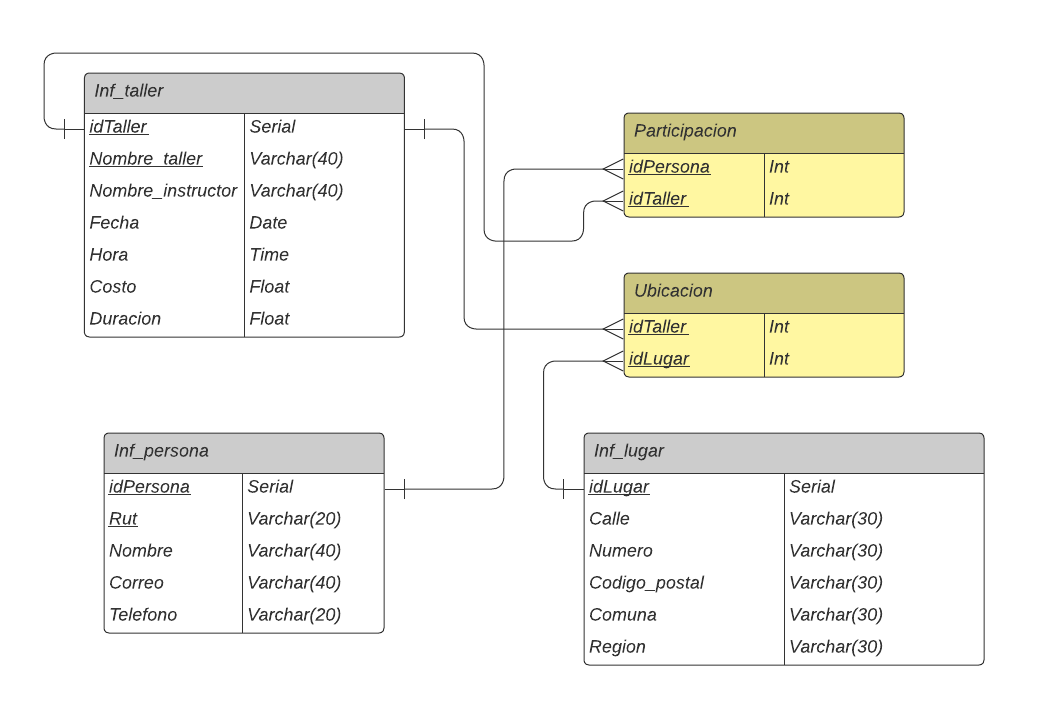

**¿Cómo lograste guardar la información de que una persona participa en un taller, y que un taller se realiza en un lugar específico?**

Para lograr guardar esta información, se emplearon 2 tablas transaccionales (‘Participacion’ y ‘Ubicacion’) mediante estas tablas se almacenará la información de los participantes que asistirán a cierto taller en específico (identificados solamente con las llaves primarias autoincrementales) y con esta misma lógica se almacenará el sitio donde se desarrollaran los talleres planteados.


##Pregunta 2

Con tu esquema en mano, debes escribir los comandos SQL para crear las tablas en tu esquema. Esto requiere tener cinco o más comandos de tipo “CREATE TABLE…” que deben poder ejecutarse correctamente en SQL. Quiere decir, si nosotros ejecutamos estos comandos, el motor de SQL no nos dará un error. Para esto, te recomendamos correr tus comandos directamente en el siguiente campo de Notebook en Google Colab:

In [ ]:
%%sql

DROP TABLE IF EXISTS Participacion;
DROP TABLE IF EXISTS Ubicacion;
DROP TABLE IF EXISTS Inf_persona;
DROP TABLE IF EXISTS Inf_taller;
DROP TABLE IF EXISTS Inf_lugar;

CREATE TABLE IF NOT EXISTS Participacion(
    idPersona int,
    idTaller int,
    PRIMARY KEY (idPersona, idTaller)
);

CREATE TABLE IF NOT EXISTS Ubicacion(
    idTaller int,
    idLugar int,
    PRIMARY KEY (idTaller, idLugar)
);

CREATE TABLE Inf_persona(
    idPersona SERIAL,
    Rut varchar(20),
    Nombre varchar(40),
    Correo varchar(40) DEFAULT 'n/a',
    Telefono varchar(20) DEFAULT 'n/a',
    PRIMARY KEY (idPersona, Rut)
);

CREATE TABLE Inf_taller(
    idTaller SERIAL,
    Nombre_taller varchar(40),
    Nombre_instructor varchar(40),
    Fecha date,
    Hora time,
    Costo float,
    Duracion float,
    PRIMARY KEY (idTaller, Nombre_taller)
);

CREATE TABLE Inf_lugar(
    idLugar SERIAL PRIMARY KEY,
    Calle varchar(30),
    Numero varchar(30),
    Codigo_postal varchar(30),
    Comuna varchar(30),
    Region varchar(30)
);

 * postgresql+psycopg2://@/postgres


""


##Pregunta 3

Con tus tablas creadas, ahora las vamos a llenar de datos. Te pedimos insertar la siguiente información, descrita de manera informal, a tu base de datos:

Personas:
-	John Russo, rut: 883.111.6793-1, correo: john.russo@uc.cl, tel: 748-29-1038
-	Matthew Howard, rut: 323.654.56-1, correo:matthew.howard@uc.cl, tel: 004-11-7328
-	Susan Griffith, rut: 389.197.781-5, correo:susan.griffith@email.com, tel: 342-03-4478

Todas estas personas participan en el taller con datos: 
- nombre: Taller de cocina, instructor: Gibson, fecha: 2021-12-28, hora: 12:00, valor: 9, duración: 1.5.

También, disponemos de información que John Russo participa en el taller con datos: 
- nombre: Taller 11, instructor: Jonathan Duffy, fecha: 2022-12-11, hora: 13:00, valor: 7, duración: 1.0.

Crea los comandos “INSERT INTO…” que inserta esta información a tus tablas. Estos comandos deben correr correctamente en SQL en el siguiente campo:


In [ ]:
%%sql
INSERT INTO Inf_persona(Rut, Nombre, Correo, Telefono) VALUES('883.111.6793-1', 'John Russo', 'john.russo@uc.cl', '748-29-1038');
INSERT INTO Inf_persona(Rut, Nombre, Correo, Telefono) VALUES('323.654.56-1', 'Matthew Howard', 'matthew.howard@uc.cl', '004-11-7328'); 
INSERT INTO Inf_persona(Rut, Nombre, Correo, Telefono) VALUES('389.197.781-5', 'Susan Griffith', 'susan.griffith@email.com', '342-03-4478');

 * postgresql+psycopg2://@/postgres


""


In [ ]:
%%sql
Select *
From Inf_persona;

 * postgresql+psycopg2://@/postgres


,idpersona,rut,nombre,correo,telefono
0,1,883.111.6793-1,John Russo,john.russo@uc.cl,748-29-1038
1,2,323.654.56-1,Matthew Howard,matthew.howard@uc.cl,004-11-7328
2,3,389.197.781-5,Susan Griffith,susan.griffith@email.com,342-03-4478


In [ ]:
%%sql
INSERT INTO Inf_taller(Nombre_taller, Nombre_instructor, Fecha, Hora, Costo, Duracion) VALUES ('Taller de cocina', 'Gibson', '2021/12/28', '12:00:00', 9, 1.5);
INSERT INTO Inf_taller(Nombre_taller, Nombre_instructor, Fecha, Hora, Costo, Duracion) VALUES ('Taller 11', 'Jonathan Duffy', '2022/12/11', '13:00:00', 7, 1.0);

 * postgresql+psycopg2://@/postgres


""


In [ ]:
%%sql
Select *
From Inf_taller;

 * postgresql+psycopg2://@/postgres


,idtaller,nombre_taller,nombre_instructor,fecha,hora,costo,duracion
0,1,Taller de cocina,Gibson,2021-12-28,12:00:00,9.0,1.5
1,2,Taller 11,Jonathan Duffy,2022-12-11,13:00:00,7.0,1.0


In [ ]:
%%sql
INSERT INTO Inf_lugar VALUES (default, 'Calle 13', 'Numero 13-41', '500142', 'Comuna 14', 'Region Norteña');
INSERT INTO Inf_lugar VALUES (default, 'Calle 44', 'Numero 8b-66', '500012', 'Comuna 2', 'Region Anglosajona');

 * postgresql+psycopg2://@/postgres


""


In [ ]:
%%sql
Select *
From Inf_lugar;

 * postgresql+psycopg2://@/postgres


,idlugar,calle,numero,codigo_postal,comuna,region
0,1,Calle 13,Numero 13-41,500142,Comuna 14,Region Norteña
1,2,Calle 44,Numero 8b-66,500012,Comuna 2,Region Anglosajona


In [ ]:
%%sql
INSERT INTO Participacion VALUES (1, 1);
INSERT INTO Participacion VALUES (2, 1);
INSERT INTO Participacion VALUES (3, 1);
INSERT INTO Participacion VALUES (1, 2);

 * postgresql+psycopg2://@/postgres


""


In [ ]:
%%sql
Select *
From Participacion;

 * postgresql+psycopg2://@/postgres


,idpersona,idtaller
0,1,1
1,2,1
2,3,1
3,1,2


In [ ]:
%%sql
INSERT INTO Ubicacion VALUES (1, 1);
INSERT INTO Ubicacion VALUES (2, 2);

 * postgresql+psycopg2://@/postgres


""


In [ ]:
%%sql
Select *
From Ubicacion;

 * postgresql+psycopg2://@/postgres


,idtaller,idlugar
0,1,1
1,2,2


##Pregunta 4

Escriba en SQL la consulta que sobre tu base de datos devuelve nombre de todos los talleres. Esta consulta se debe ejecutar correctamente sobre tu esquema, y los datos ingresados en la Pregunta 3, pero también en otras instancias de tu esquema relacional.

La consulta la puedes ingresar al siguiente campo:

In [ ]:
%%sql
Select Nombre_taller
From Inf_taller;

 * postgresql+psycopg2://@/postgres


,nombre_taller
0,Taller de cocina
1,Taller 11


In [ ]:
%%sql
Select Nombre
From Inf_persona as persona
Where persona.Rut = '004-11-7328';

 * postgresql+psycopg2://@/postgres


""


In [ ]:
%%sql
Select Nombre_taller, Nombre_instructor, Hora
From Inf_taller as taller 
Where taller.Costo BETWEEN 1 AND 8;

 * postgresql+psycopg2://@/postgres


,nombre_taller,nombre_instructor,hora
0,Taller 11,Jonathan Duffy,13:00:00


In [ ]:
%%sql
Select idLugar, Region
From Inf_lugar;

 * postgresql+psycopg2://@/postgres


,idlugar,region
0,1,Region Norteña
1,2,Region Anglosajona


In [ ]:
%%sql
Select *
From Participacion;

 * postgresql+psycopg2://@/postgres


,idpersona,idtaller
0,1,1
1,2,1
2,3,1
3,1,2
